### Website traffic prediction

Predicting website traffic using exogenous features such as festivals 

#### Features:
Date

Udemy 

Easter

Christmas

Datan source: Data heroes https://bit.ly/udemy_df

In [1]:
import os                                   # os & directory operations package
import pandas as pd                         # data tools package
import numpy as np                          # number tools package
import matplotlib.pyplot as plt             # plots package
import seaborn as sns                       # good looking plots package
sns.set()
import statsmodels.graphics.tsaplots as sgt # timese
from sklearn.preprocessing import MinMaxScaler # For nornalizing
import statsmodels.tsa.stattools as sts     # 
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.stattools import acf
from statsmodels.tsa.stattools import adfuller
import statsmodels.api as sm
from pmdarima.arima import auto_arima
from statsmodels.tsa.statespace.sarimax import SARIMAX
from IPython.display import Image
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()
%matplotlib inline
plt.rcParams.update({'figure.figsize':(9,7), 'figure.dpi':120})

C:\Users\aravi\.conda\envs\tf-gpu\lib\site-packages\scipy\__init__.py:138: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5)
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion} is required for this version of "


In [2]:
# Accuracy metrics
def forecast_accuracy(forecast, actual):
    mape = np.mean(np.abs(forecast - actual)/np.abs(actual))  # MAPE
    accuracy = 100 - (100*mape)
    me = np.mean(forecast - actual)             # ME
    mae = np.mean(np.abs(forecast - actual))    # MAE
    mpe = np.mean((forecast - actual)/actual)   # MPE
    rmse = np.mean((forecast - actual)**2)**.5  # RMSE
    corr = np.corrcoef(forecast, actual)[0,1]   # corr
    mins = np.amin(np.hstack([forecast[:,None], 
                              actual[:,None]]), axis=1)
    maxs = np.amax(np.hstack([forecast[:,None], 
                              actual[:,None]]), axis=1)
    minmax = 1 - np.mean(mins/maxs)             # minmax
    acf1 = acf(forecast-actual)[1]                      # ACF1
    return({'accuracy': accuracy, 'mape':mape, 'me':me, 'mae': mae, 
            'mpe': mpe, 'rmse':rmse, 'acf1':acf1, 
            'corr':corr, 'minmax':minmax})

In [3]:
df = pd.read_csv("https://bit.ly/udemy_df",
            index_col = "Date",
            parse_dates = True).asfreq("D")
df.head()  

,Udemy,Easter,Christmas
Date,,,
2016-01-01,311,0,0
2016-01-02,564,0,0
2016-01-03,517,0,0
2016-01-04,652,0,0
2016-01-05,756,0,0


In [4]:
# Copying for Preparation
df = df.copy()

# Checking for NA
df.isna().sum()




Udemy        0
Easter       0
Christmas    0
dtype: int64

In [5]:
# If NA is present, handle it with one of below methods 

#dataset_for_prediction.fillna(method= 'backfill')
df=df.fillna(method= 'ffill')
#dataset_for_prediction.fillna(method= 'pad')
#dataset_for_prediction.fillna(method= 'bfill')


df.isna().sum()

Udemy        0
Easter       0
Christmas    0
dtype: int64

In [6]:
# Leaving 31 days at the end, training data will contain all remaining data

training_y = df.iloc[:-31,0]
test_y = df.iloc[-31:,0]
training_X = df.iloc[:-31,1:]
test_X = df.iloc[-31:,1:]



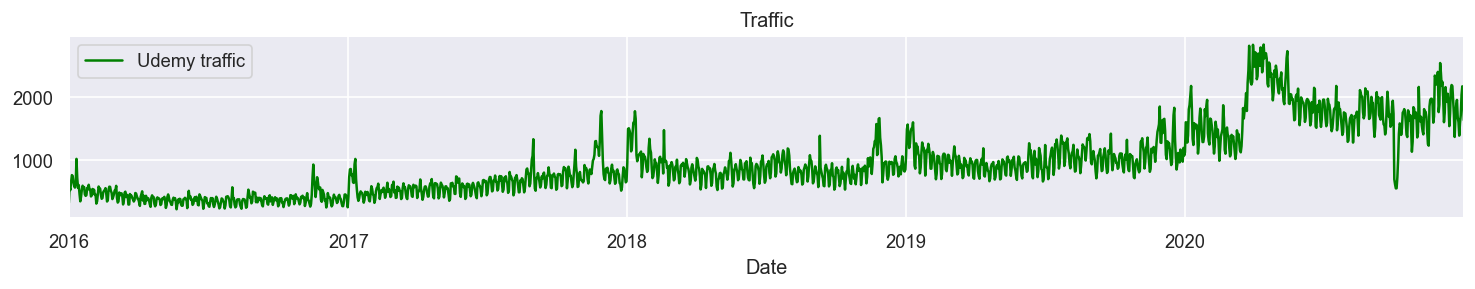

In [8]:
# Plotting the required time series - Mean
df['Udemy'].plot(color='green', figsize=(15,2));
plt.legend(['Udemy traffic', 'Mean']);
plt.title("Traffic");

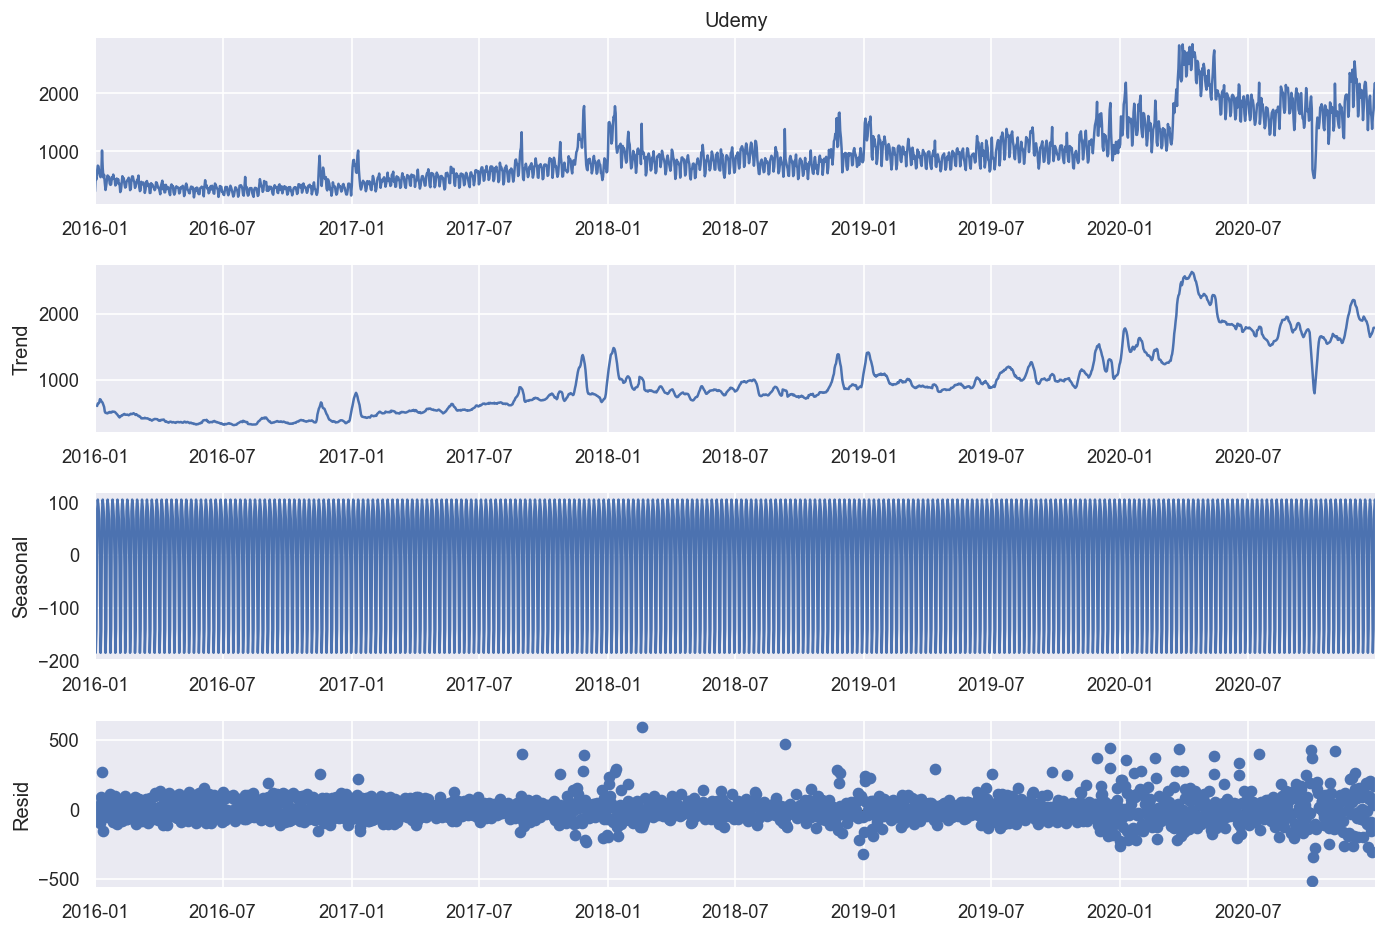

In [9]:
seas_d=sm.tsa.seasonal_decompose(df['Udemy'].dropna(),model='add',period=7);
fig=seas_d.plot()
fig.set_figheight(8)
fig.set_figwidth(12)
plt.show();

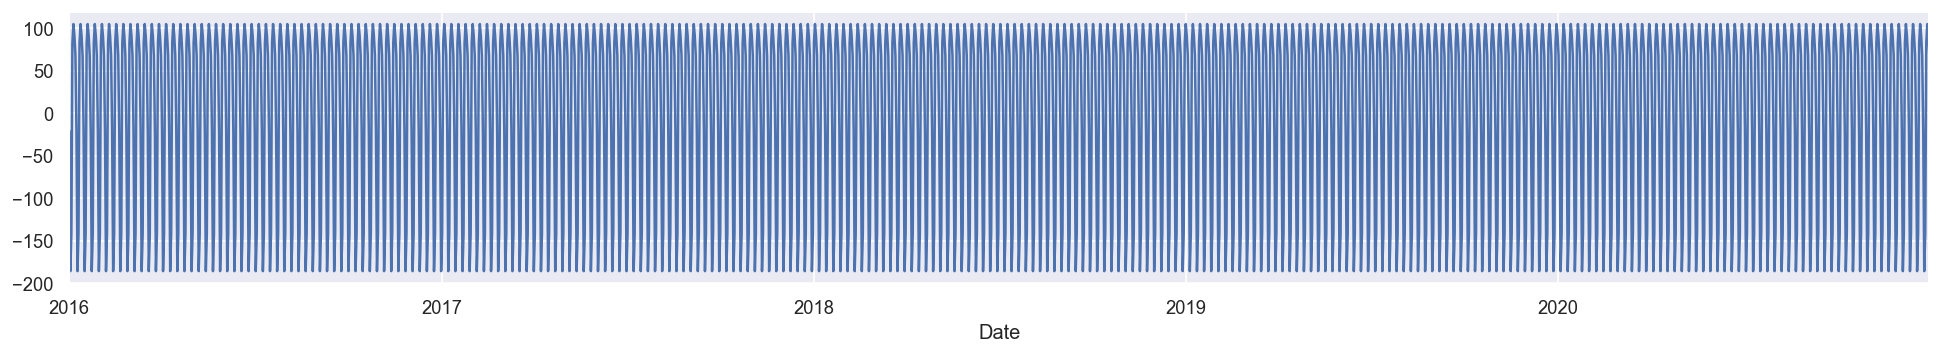

In [10]:
# Additive model
seas_d=sm.tsa.seasonal_decompose(df["Udemy"],model='add',period=7);
fig=seas_d.seasonal
fig.plot(figsize = (20,3))
plt.show();

In [12]:
#Training auto arima with seasonality fixed to 7 units as this data shows to be weekly seasonal
model = auto_arima(y = training_y,
                   X = training_X,
                   m = 7)

C:\Users\aravi\.conda\envs\tf-gpu\lib\site-packages\pmdarima\arima\_auto_solvers.py:522: ModelFitWarning: Error fitting  ARIMA(5,1,2)(1,0,1)[7]           (if you do not want to see these warnings, run with error_action="ignore").
Traceback:
Traceback (most recent call last):
  File "C:\Users\aravi\.conda\envs\tf-gpu\lib\site-packages\pmdarima\arima\_auto_solvers.py", line 506, in _fit_candidate_model
    fit.fit(y, X=X, **fit_params)
  File "C:\Users\aravi\.conda\envs\tf-gpu\lib\site-packages\pmdarima\arima\arima.py", line 597, in fit
    self._fit(y, X, **fit_args)
  File "C:\Users\aravi\.conda\envs\tf-gpu\lib\site-packages\pmdarima\arima\arima.py", line 518, in _fit
    fit, self.arima_res_ = _fit_wrapper()
  File "C:\Users\aravi\.conda\envs\tf-gpu\lib\site-packages\pmdarima\arima\arima.py", line 508, in _fit_wrapper
    return arima, arima.fit(start_params=start_params,
  File "C:\Users\aravi\.conda\envs\tf-gpu\lib\site-packages\statsmodels\tsa\statespace\mlemodel.py", line 690, in 

In [29]:
# Predict for N period

predictions = pd.Series(model.predict(n_periods = 31,
                                      X = test_X))
predictions.index = test_y.index
predictions.head()

Date
2020-12-01    2452.906964
2020-12-02    2313.200040
2020-12-03    2303.168286
2020-12-04    2291.565068
2020-12-05    1876.672270
Freq: D, dtype: float64

In [31]:
predictions[:5]

Date
2020-12-01    2452.906964
2020-12-02    2313.200040
2020-12-03    2303.168286
2020-12-04    2291.565068
2020-12-05    1876.672270
Freq: D, dtype: float64

<AxesSubplot:xlabel='Date'>

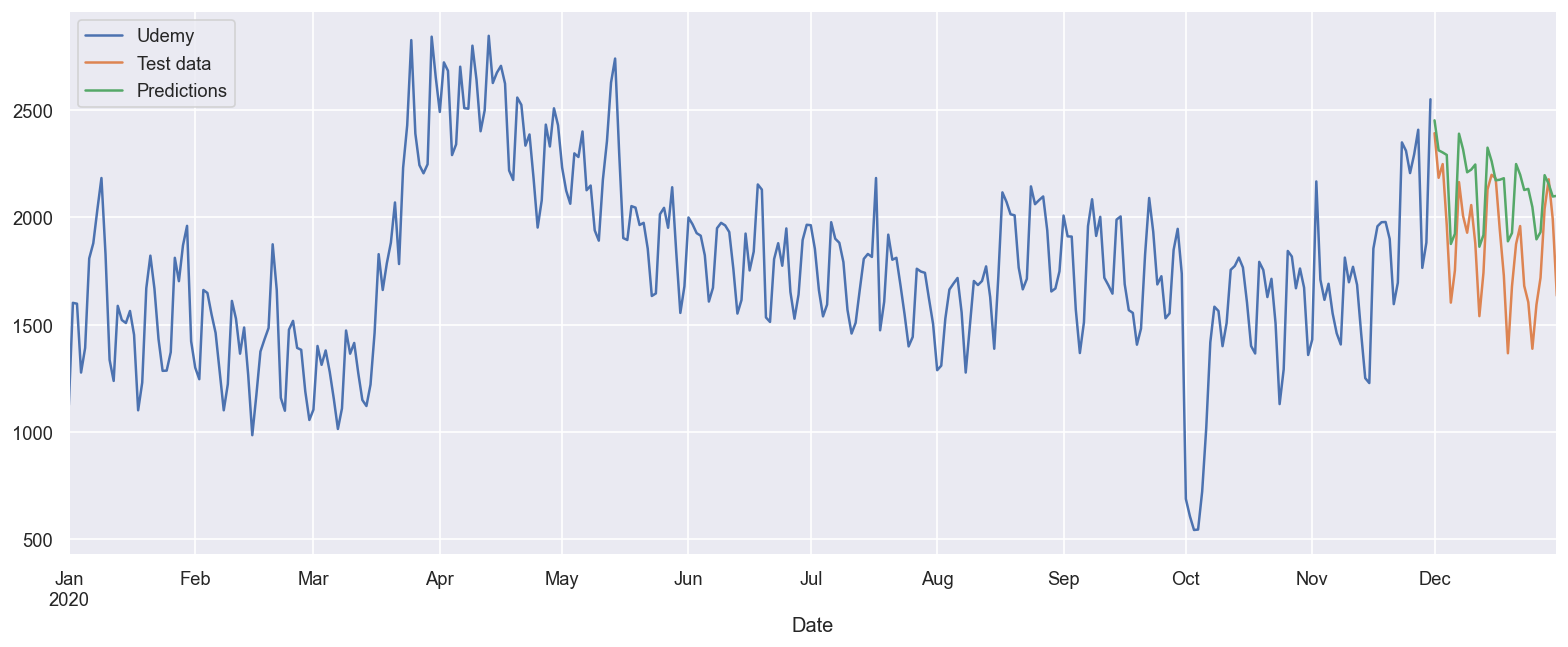

In [34]:
#Visualizing the result
training_y['2020-01-01':].plot(figsize = (16,6), legend = True)
test_y.plot(legend = True, label = "Test data")
predictions.plot(legend = True, label ="Predictions")


In [42]:
forecast_accuracy(np.array(predictions.values.tolist()), np.array(test_y.values.tolist()))

C:\Users\aravi\.conda\envs\tf-gpu\lib\site-packages\statsmodels\tsa\stattools.py:657: FutureWarning: The default number of lags is changing from 40 tomin(int(10 * np.log10(nobs)), nobs - 1) after 0.12is released. Set the number of lags to an integer to  silence this warning.
  warnings.warn(
C:\Users\aravi\.conda\envs\tf-gpu\lib\site-packages\statsmodels\tsa\stattools.py:667: FutureWarning: fft=True will become the default after the release of the 0.12 release of statsmodels. To suppress this warning, explicitly set fft=False.
  warnings.warn(


{'accuracy': 84.82583580818063,
 'mape': 0.15174164191819375,
 'me': 259.5398154317102,
 'mae': 261.4897871791846,
 'mpe': 0.1508468079102857,
 'rmse': 305.84595856994287,
 'acf1': 0.4481575567991467,
 'corr': 0.8028210327568631,
 'minmax': 0.12437768452544484}

The model with exogenous features produce accuracy of ~85% woth correlation coefficient of 0.8